In [55]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import requests
import io

In [56]:
# File to Load (Remember to Change These)
file_to_load = "yelpDataCategories.csv"


In [57]:
# Read Purchasing File and store into Pandas data frame
yelp_data = pd.read_csv(file_to_load, low_memory=False)
yelp_data.head(15)

,Unnamed: 0,city,latitude,longitude,review_count,stars,state,Active Life,Barbers,Beauty & Spas,...,Nail Salons,Plumbing,Printing Services,Restaurants,Seafood,Shipping Centers,Shopping,Specialty Food,Sushi Bars,Water Heater Installation/Repair
0,0,Phoenix,33.522143,-112.018481,5,3.0,AZ,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Mississauga,43.605499,-79.652289,128,2.5,ON,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2,Charlotte,35.092564,-80.859132,170,4.0,NC,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,3,Goodyear,33.455613,-112.395596,3,5.0,AZ,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Charlotte,35.190012,-80.887223,4,4.0,NC,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5,5,Mississauga,43.599475,-79.711584,3,2.5,ON,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,6,Calgary,50.943646,-114.001828,7,3.5,AB,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,7,Las Vegas,36.099872,-115.074574,3,3.5,NV,0,1,1,...,0,0,0,0,0,0,1,0,0,0
8,8,Glendale,33.654815,-112.188568,8,5.0,AZ,0,0,1,...,1,0,0,0,0,0,0,0,0,0
9,9,Fairview Park,41.440825,-81.854097,8,4.5,OH,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [68]:
yelp_data.groupby("city").Golf.sum()

city
110 Las Vegas                   0
AGINCOURT                       0
AVON                            0
AZ                              0
Agincourt                       0
Ahwahtukee                      0
Ahwatukee                       0
Ahwatukee Foothills Village     0
Airdrie                         9
Ajax                           19
Akron                          32
Alberta                         1
Alburg                          0
Alburgh                         0
Aliquippa                       0
Allegheny                       0
Allentown                       0
Allison Park                   12
Ambridge                        3
Amherst                         4
Ange-Gardien                    0
Anjou                           2
Ansnorveldt                     0
Anthem                          1
Antioch                         0
Apache Junction                 2
Apache Trail                    0
Arizona                         1
Arnold                          0
Arrowhead

In [69]:
restGroups = yelp_data.groupby("city").Golf.sum().reset_index()
restGroups.head()

,city,Golf
0,110 Las Vegas,0
1,AGINCOURT,0
2,AVON,0
3,AZ,0
4,Agincourt,0


In [70]:
restGroupsSort = restGroups.sort_values("Golf", ascending=False).reset_index(drop=True)
top50 = restGroupsSort.head(50)
top50.head()

,city,Golf
0,Las Vegas,1745
1,Toronto,1221
2,Phoenix,1100
3,Charlotte,620
4,Scottsdale,591


In [ ]:
len(restGroupsSort["city"])

In [ ]:
# xticks = [x for x in top50]
# xticks

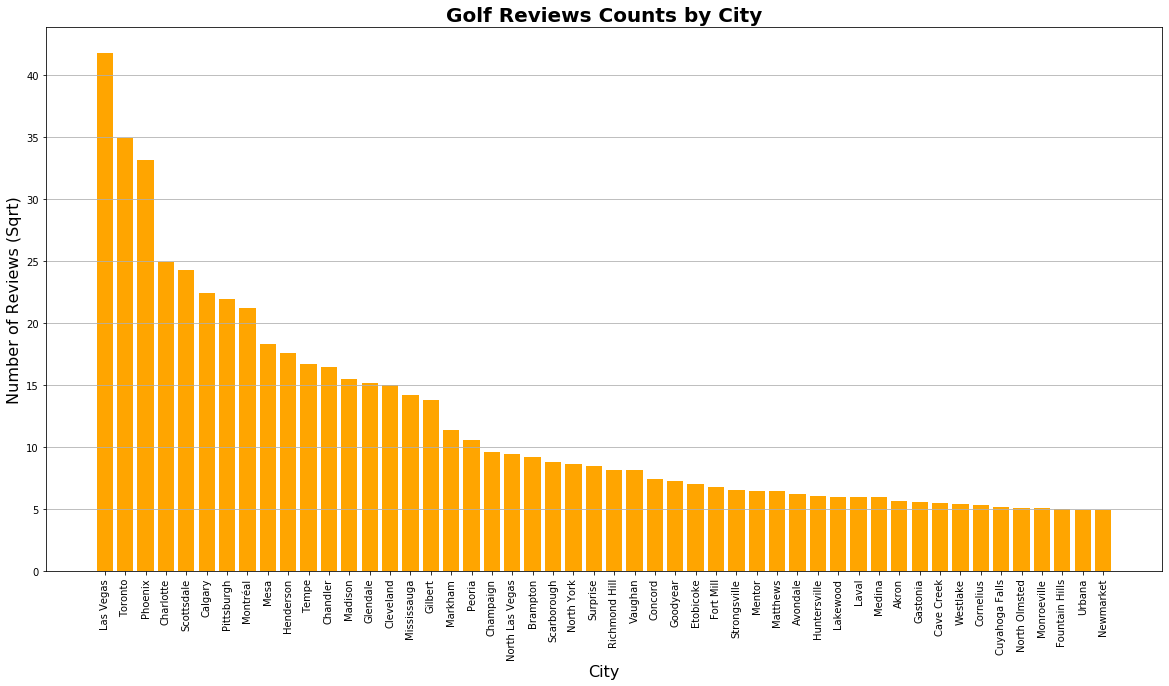

In [71]:
%matplotlib inline

plt.figure(figsize=(20,10))

plt.bar(top50.city, np.sqrt(top50.Golf), color="orange")

plt.xticks(top50["city"],rotation=90)
plt.title("Golf Reviews Counts by City", weight="bold", fontsize=20)
plt.xlabel("City", fontsize=16)
plt.ylabel("Number of Reviews (Sqrt)", fontsize=16)

plt.grid(axis='y')

plt.savefig("GolfByCity.png")


plt.show()

In [ ]:
yelp_data.columns

In [ ]:
category = "Golf"

In [ ]:
#get data
catGroups = yelp_data.groupby("golf")[category].sum().reset_index()
catGroupsSort = catGroups.sort_values(category, ascending=False).reset_index(drop=True)

#plot
%matplotlib inline

plt.figure(figsize=(20,10))

plt.bar(catGroupsSort.state, np.sqrt(catGroupsSort[category]), color="seagreen")


plt.title(category + " Reviews Counts by State", weight="bold", fontsize=20)
plt.xlabel("City", fontsize=16)
plt.ylabel("Number of Reviews (Sqrt)", fontsize=16)

plt.grid(axis='y')

plt.savefig(category + "ByCity.png")


plt.show()